## notas

- ver palavras q aparecem juntas? correlacoes?

In [1]:
import pandas as pd

df = pd.read_parquet("data05.parquet")
df["keywords"] = df["keywords"].map(lambda dic: {key: dic[key] for key in dic.keys() if dic[key] is not None and dic[key]["filter"] > 0.01})
df

,aliases,news,keywords
companies,,,
Banco Comercial Português,"[Banco Comercial Português, BCP]",[{'ExtractedText': 'DN 13 de Setembro de 200...,"{'25 de abril': {'count': 11.0, 'date': {'2014..."
Galp Energia,"[Galp Energia, GALP]",[{'ExtractedText': 'RTP Galp reforça posição n...,"{'A Galp': {'count': 29.0, 'date': {'201008': ..."
EDP,"[EDP, Energias de Portugal, Electricidade de P...",[{'ExtractedText': 'DN-Sinteses Negocios 9 de ...,"{'ASSEMBLEIA DA REPÚBLICA': {'count': 28.0, 'd..."
Sonae,"[Sonae, SON]",[{'ExtractedText': 'DN-Sinteses 5 de Março de ...,"{'A Sonae': {'count': 35.0, 'date': {'201005':..."
Mota-Engil,"[Mota-Engil, EGL]",[{'ExtractedText': 'RTP Lucro da Mota-Engil so...,"{'A Mota-Engil': {'count': 23.0, 'date': {'201..."


In [2]:
def get_wordsTS(data):
    dates_monthly = pd.date_range(start="2000-01-01", end="2020-12-31", freq="MS").strftime("%Y%m").tolist()
    words_ts = {}
    for key in data.keys():
        dici = {date: 0 for date in dates_monthly}
        for date in data[key]["date"]:
            count = data[key]["date"][date]
            if count != None:
                dici[date] = data[key]["date"][date]
        words_ts[key] = list(dici.values())
    return words_ts

wordsTS = df["keywords"].map(get_wordsTS)

def modify_key(key, word):
    if key == 'Banco Comercial Português':
        return "BCP|" + word
    elif key == 'Galp Energia':
        return "GLP|" + word 
    elif key == 'EDP':
        return "EDP|" + word
    elif key == 'Sonae':
        return "SON|" + word
    elif key == 'Mota-Engil':
        return "EGL|" + word
    else:
        print("shdahsgdiuhasuihda")
grouped_wordsTS = {modify_key(company, word): ts for company, wts in wordsTS.items() for word, ts in wts.items()}
#grouped_wordsTS

In [3]:
data = pd.DataFrame(grouped_wordsTS)
data

,BCP|25 de abril,BCP|ABN,BCP|ABN Amro,BCP|ACIDENTE,BCP|ATÉ,BCP|Abel Coentrão,BCP|Abr,BCP|Acompanhe,BCP|Acuinova-Mira,BCP|Acções do BCP,...,EGL|Últimas,EGL|Últimas Portugal,EGL|água,EGL|águas,EGL|álcool,EGL|áreas,EGL|âmbito,EGL|época,EGL|órgão,EGL|órgãos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = data.corr()
#print(correlation_matrix.min().min())

#correlation_matrix = correlation_matrix.round(3)
#correlation_matrix[correlation_matrix.abs() < 0.3] = 0

correlation_matrix

,BCP|25 de abril,BCP|ABN,BCP|ABN Amro,BCP|ACIDENTE,BCP|ATÉ,BCP|Abel Coentrão,BCP|Abr,BCP|Acompanhe,BCP|Acuinova-Mira,BCP|Acções do BCP,...,EGL|Últimas,EGL|Últimas Portugal,EGL|água,EGL|águas,EGL|álcool,EGL|áreas,EGL|âmbito,EGL|época,EGL|órgão,EGL|órgãos
BCP|25 de abril,1.000000,-0.008572,-0.008572,0.146657,-0.016059,-0.010342,0.359583,-0.018419,-0.008766,0.004605,...,-0.023931,-0.009036,-0.020058,-0.014506,-0.018419,0.051818,0.048697,0.199039,-0.021355,0.163419
BCP|ABN,-0.008572,1.000000,-0.005283,-0.015210,-0.009897,-0.006374,-0.009062,-0.011351,-0.005403,-0.010407,...,-0.014749,-0.005569,-0.012362,-0.008940,-0.011351,-0.017973,-0.014607,-0.011733,-0.013161,-0.008330
BCP|ABN Amro,-0.008572,-0.005283,1.000000,-0.015210,-0.009897,-0.006374,-0.009062,-0.011351,-0.005403,-0.010407,...,-0.014749,-0.005569,-0.012362,-0.008940,-0.011351,-0.017973,-0.014607,-0.011733,-0.013161,-0.008330
BCP|ACIDENTE,0.146657,-0.015210,-0.015210,1.000000,0.048304,-0.018351,0.062459,-0.032682,-0.015555,0.008172,...,-0.023389,0.008454,0.185631,0.155697,-0.032682,-0.003849,-0.042056,0.030710,-0.037892,-0.023982
BCP|ATÉ,-0.016059,-0.009897,-0.009897,0.048304,1.000000,-0.011941,-0.016977,-0.021266,-0.010121,0.044727,...,-0.027630,-0.010432,0.072643,-0.016748,-0.021266,-0.033670,0.013199,-0.021981,-0.024656,-0.015605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EGL|áreas,0.051818,-0.017973,-0.017973,-0.003849,-0.033670,-0.021684,-0.030828,0.108830,-0.018379,0.144837,...,0.423127,0.212524,0.413518,0.416219,-0.038617,1.000000,0.380377,0.074389,-0.002035,0.095316
EGL|âmbito,0.048697,-0.014607,-0.014607,-0.042056,0.013199,-0.017623,0.021715,0.012554,-0.014938,0.132364,...,0.201016,-0.015397,0.112713,0.087085,0.144375,0.380377,1.000000,-0.032441,-0.017285,0.087517
EGL|época,0.199039,-0.011733,-0.011733,0.030710,-0.021981,0.164208,-0.020126,0.040967,0.050995,-0.023113,...,0.027939,-0.012368,0.274227,0.316919,0.107145,0.074389,-0.032441,1.000000,0.143409,-0.018500
EGL|órgão,-0.021355,-0.013161,-0.013161,-0.037892,-0.024656,-0.015879,0.411998,0.083068,-0.013459,0.110186,...,0.133459,-0.013873,0.025603,0.058677,0.268647,-0.002035,-0.017285,0.143409,1.000000,0.586211


In [5]:
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns



# Convert the column and index labels to numeric indices
correlation_matrix_numeric = correlation_matrix.copy()

# Create a mapping from column/index labels to numeric indices
column_mapping = {col: idx for idx, col in enumerate(correlation_matrix.columns)}
index_mapping = {idx: row_idx for row_idx, idx in enumerate(correlation_matrix.index)}

# Replace column and index labels with numeric indices
correlation_matrix_numeric.columns = correlation_matrix.columns.map(column_mapping)
correlation_matrix_numeric.index = correlation_matrix.index.map(index_mapping)

# Convert the cleaned correlation matrix to xarray
correlation_matrix_xr = xr.DataArray(correlation_matrix_numeric.values,
                                     coords=[correlation_matrix_numeric.columns, correlation_matrix_numeric.index],
                                     dims=["columns", "index"])

# Create a Datashader Canvas for plotting
canvas = ds.Canvas(plot_width=len(correlation_matrix), plot_height=len(correlation_matrix))

# Rasterize the correlation matrix
image = canvas.raster(correlation_matrix_xr)

# Apply a transfer function to shade the image as a heatmap
#image = tf.shade(image)

# Display the image using Matplotlib

/opt/anaconda3/envs/fcdProj/lib/python3.10/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


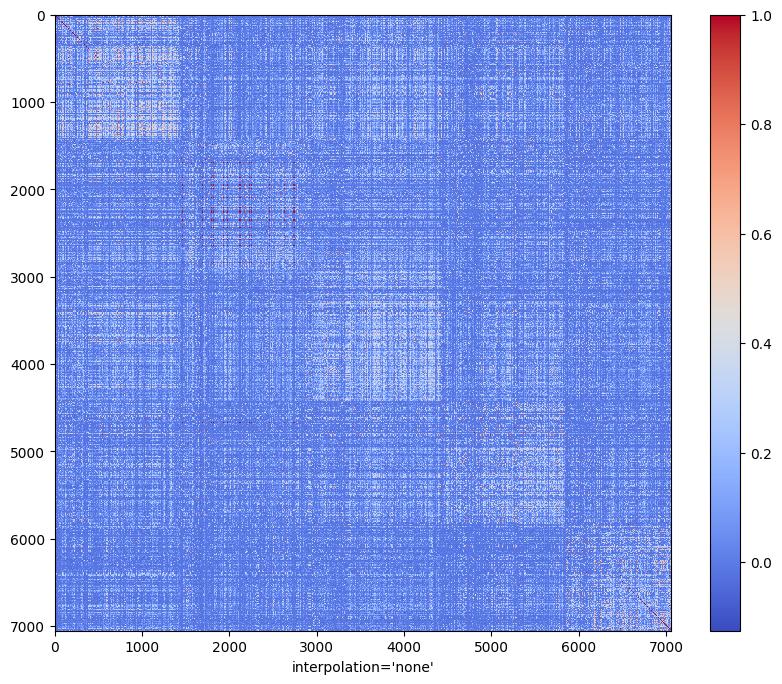

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(image, aspect='equal', cmap='coolwarm', interpolation='none')
plt.xlabel(r"interpolation='none'")
plt.colorbar()
plt.show()

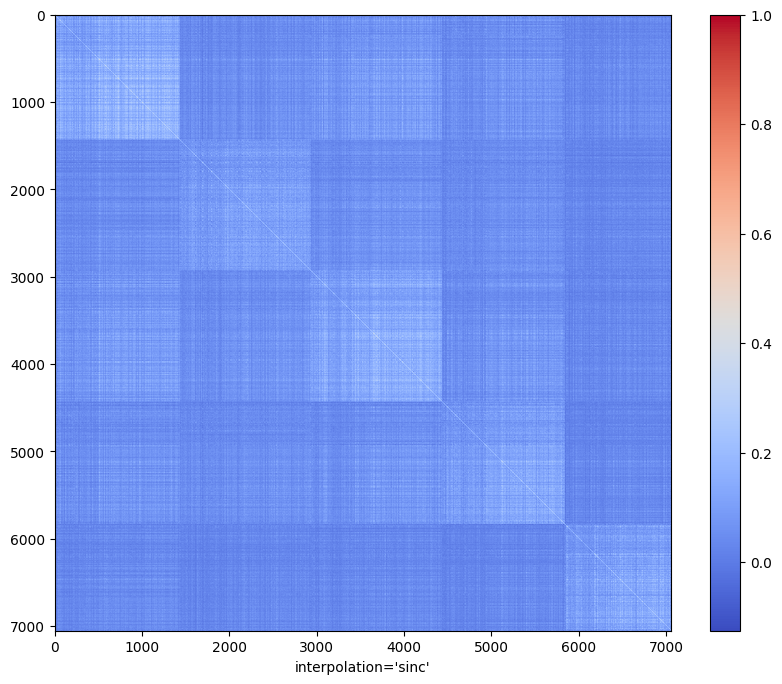

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(image, aspect='equal', cmap='coolwarm', interpolation='sinc')
plt.xlabel(r"interpolation='sinc'")
plt.colorbar()
plt.show()

---

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_14779/1282959426.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


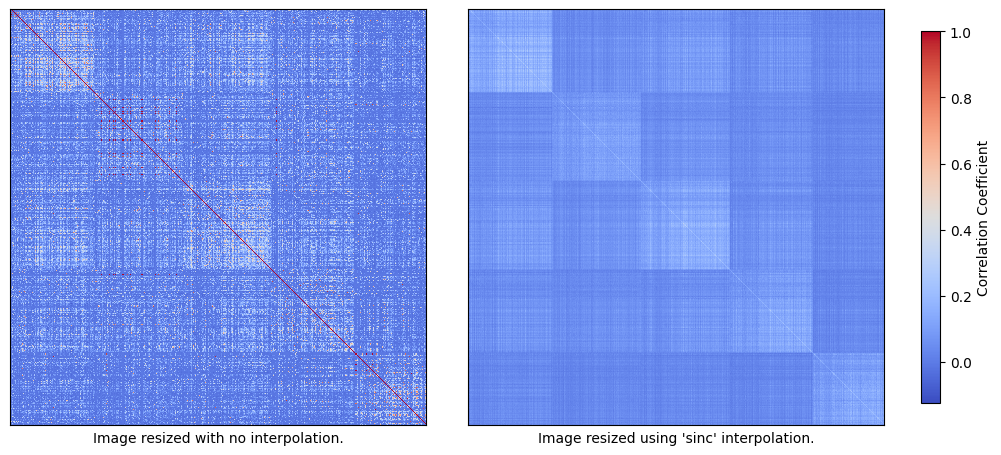

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter


# Example image data
image = canvas.raster(correlation_matrix_xr)
#image = np.random.rand(10, 10)


# Create the figure and the two side-by-side axes for the images
fig, axs = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'wspace': 0.1})
cmap = 'coolwarm'

# Plot the first image on the left
im1 = axs[0].imshow(image, aspect='equal', cmap=cmap, interpolation='none')
axs[0].set_xlabel(r"Image resized with no interpolation.")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot the second image on the right
im2 = axs[1].imshow(image, aspect='equal', cmap=cmap, interpolation='sinc')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel(r"Image resized using 'sinc' interpolation.")


# Add a single colorbar centered between the plots with a more proportional size
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Correlation Coefficient')  

fig.tight_layout()
fig.savefig('keywords_correlation.png', transparent=True)
# Show the final plot
plt.show()


---
---
---
---
---
---

In [1]:
import pandas as pd

df = pd.read_parquet("data05.parquet")
df["keywords"] = df["keywords"].map(lambda dic: {key: dic[key] for key in dic.keys() if dic[key] is not None and dic[key]["filter"] > 0.01})

def get_wordsTS(data):
    dates_monthly = pd.date_range(start="2000-01-01", end="2020-12-31", freq="MS").strftime("%Y%m").tolist()
    words_ts = {}
    for key in data.keys():
        dici = {date: 0 for date in dates_monthly}
        for date in data[key]["date"]:
            count = data[key]["date"][date]
            if count != None:
                dici[date] = data[key]["date"][date]
        words_ts[key] = list(dici.values())
    return words_ts

wordsTS = df["keywords"].map(get_wordsTS)

def modify_key(key, word):
    if key == 'Banco Comercial Português':
        return "BCP|" + word
    elif key == 'Galp Energia':
        return "GLP|" + word 
    elif key == 'EDP':
        return "EDP|" + word
    elif key == 'Sonae':
        return "SON|" + word
    elif key == 'Mota-Engil':
        return "EGL|" + word
    else:
        print("shdahsgdiuhasuihda")
grouped_wordsTS = {modify_key(company, word): ts for company, wts in wordsTS.items() for word, ts in wts.items()}
#grouped_wordsTS

data = pd.DataFrame(grouped_wordsTS)

correlation_matrix = data.corr()

correlation_matrix

,BCP|25 de abril,BCP|ABN,BCP|ABN Amro,BCP|ACIDENTE,BCP|ATÉ,BCP|Abel Coentrão,BCP|Abr,BCP|Acompanhe,BCP|Acuinova-Mira,BCP|Acções do BCP,...,EGL|Últimas,EGL|Últimas Portugal,EGL|água,EGL|águas,EGL|álcool,EGL|áreas,EGL|âmbito,EGL|época,EGL|órgão,EGL|órgãos
BCP|25 de abril,1.000000,-0.008572,-0.008572,0.146657,-0.016059,-0.010342,0.359583,-0.018419,-0.008766,0.004605,...,-0.023931,-0.009036,-0.020058,-0.014506,-0.018419,0.051818,0.048697,0.199039,-0.021355,0.163419
BCP|ABN,-0.008572,1.000000,-0.005283,-0.015210,-0.009897,-0.006374,-0.009062,-0.011351,-0.005403,-0.010407,...,-0.014749,-0.005569,-0.012362,-0.008940,-0.011351,-0.017973,-0.014607,-0.011733,-0.013161,-0.008330
BCP|ABN Amro,-0.008572,-0.005283,1.000000,-0.015210,-0.009897,-0.006374,-0.009062,-0.011351,-0.005403,-0.010407,...,-0.014749,-0.005569,-0.012362,-0.008940,-0.011351,-0.017973,-0.014607,-0.011733,-0.013161,-0.008330
BCP|ACIDENTE,0.146657,-0.015210,-0.015210,1.000000,0.048304,-0.018351,0.062459,-0.032682,-0.015555,0.008172,...,-0.023389,0.008454,0.185631,0.155697,-0.032682,-0.003849,-0.042056,0.030710,-0.037892,-0.023982
BCP|ATÉ,-0.016059,-0.009897,-0.009897,0.048304,1.000000,-0.011941,-0.016977,-0.021266,-0.010121,0.044727,...,-0.027630,-0.010432,0.072643,-0.016748,-0.021266,-0.033670,0.013199,-0.021981,-0.024656,-0.015605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EGL|áreas,0.051818,-0.017973,-0.017973,-0.003849,-0.033670,-0.021684,-0.030828,0.108830,-0.018379,0.144837,...,0.423127,0.212524,0.413518,0.416219,-0.038617,1.000000,0.380377,0.074389,-0.002035,0.095316
EGL|âmbito,0.048697,-0.014607,-0.014607,-0.042056,0.013199,-0.017623,0.021715,0.012554,-0.014938,0.132364,...,0.201016,-0.015397,0.112713,0.087085,0.144375,0.380377,1.000000,-0.032441,-0.017285,0.087517
EGL|época,0.199039,-0.011733,-0.011733,0.030710,-0.021981,0.164208,-0.020126,0.040967,0.050995,-0.023113,...,0.027939,-0.012368,0.274227,0.316919,0.107145,0.074389,-0.032441,1.000000,0.143409,-0.018500
EGL|órgão,-0.021355,-0.013161,-0.013161,-0.037892,-0.024656,-0.015879,0.411998,0.083068,-0.013459,0.110186,...,0.133459,-0.013873,0.025603,0.058677,0.268647,-0.002035,-0.017285,0.143409,1.000000,0.586211


In [2]:
corr_long = correlation_matrix.stack().reset_index()
corr_long

,level_0,level_1,0
0,BCP|25 de abril,BCP|25 de abril,1.000000
1,BCP|25 de abril,BCP|ABN,-0.008572
2,BCP|25 de abril,BCP|ABN Amro,-0.008572
3,BCP|25 de abril,BCP|ACIDENTE,0.146657
4,BCP|25 de abril,BCP|ATÉ,-0.016059
...,...,...,...
49787131,EGL|órgãos,EGL|áreas,0.095316
49787132,EGL|órgãos,EGL|âmbito,0.087517
49787133,EGL|órgãos,EGL|época,-0.018500
49787134,EGL|órgãos,EGL|órgão,0.586211


In [3]:
print(corr_long.shape[0])
corr_long = corr_long[
    (corr_long[0].abs() >= 0.825) &
    (corr_long[0].abs() <= 0.975) #&
    #(corr_long['level_0'].str[:4] != corr_long['level_1'].str[:4])
]
corr_long[["C1", "W1"]] = corr_long["level_0"].str.split("|", expand=True)
corr_long[["C2", "W2"]] = corr_long["level_1"].str.split("|", expand=True)
corr_long.drop(['level_0', 'level_1'], axis=1, inplace=True)
corr_long = corr_long[corr_long['W1'] != corr_long['W2']]
corr_long['sorted_pair'] = corr_long.apply(lambda row: tuple(sorted([row['W1'], row['W2']])), axis=1)
corr_long = corr_long.drop_duplicates(subset='sorted_pair').drop(columns='sorted_pair').reset_index(drop=True)

###

from collections import Counter

# Count the frequency of each word
word_counts = Counter(corr_long['W1'].tolist() + corr_long['W2'].tolist())

# Function to compute rarity score for a pair
def rarity_score(row):
    return word_counts[row['W1']] + word_counts[row['W2']]

# Calculate rarity score for each pair
corr_long['Rarity'] = corr_long.apply(rarity_score, axis=1)
corr_long = corr_long.sort_values(by='Rarity', ascending=True)

###

print(corr_long.shape[0])
corr_long

49787136


/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1991/1104367152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_long[["C1", "W1"]] = corr_long["level_0"].str.split("|", expand=True)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1991/1104367152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_long[["C1", "W1"]] = corr_long["level_0"].str.split("|", expand=True)
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_1991/1104367152.py:8: SettingWithCopyWarning: 
A 

15814


,0,C1,W1,C2,W2,Rarity
5430,0.835320,BCP,reembolso,EGL,calendário,2
10288,0.906931,EDP,Biodiversidade,EDP,organizações,2
13220,0.935994,SON,empreendimento,SON,torres,2
10619,0.852861,EDP,Monchique,EDP,zonas,2
2029,0.862993,BCP,João Rendeiro,BCP,Tribunal da Relação de Lisboa,2
...,...,...,...,...,...,...
8810,0.969552,GLP,dados,GLP,direito,367
4296,0.937396,BCP,dados,BCP,resposta,373
7182,0.945624,GLP,Moçambique,GLP,direito,378
7242,0.920422,GLP,Moçambique,GLP,resposta,384


In [13]:
# é impraticavel ver 5 empresas ao mesmo tempo

corr_long[(corr_long['C1'] == "EDP") & (corr_long['C2'] == "EDP")]
#corr_long.to_csv("interesting_pairs.csv", index=False)

,0,C1,W1,C2,W2,Rarity
10288,0.906931,EDP,Biodiversidade,EDP,organizações,2
10619,0.852861,EDP,Monchique,EDP,zonas,2
10927,0.885810,EDP,Versão Normal Disponível,EDP,tópicos,2
10324,0.858768,EDP,Cajastur,EDP,Hidrocantábrico,2
10555,0.842280,EDP,MAAT,EDP,Museu de Arte,2
...,...,...,...,...,...,...
11466,0.964538,EDP,renovação,EDP,seguida,131
11248,0.968600,EDP,imediato,EDP,pagamentos,138
11225,0.832233,EDP,funções,EDP,mobilidade,166
10425,0.827028,EDP,Empresa,EDP,presidente,172


In [5]:
correlation_matrix.loc["EGL|tribunal", "EGL|AltaVia"]

np.float64(0.1329045947110116)